In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as p
from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import expon
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## Code:

In [2]:
df = pd.read_csv("insurance.csv", sep=',', encoding='UTF-8')
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [52]:
df_clean = df.drop_duplicates()
df_clean = df_clean.reset_index(drop=True)
df_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


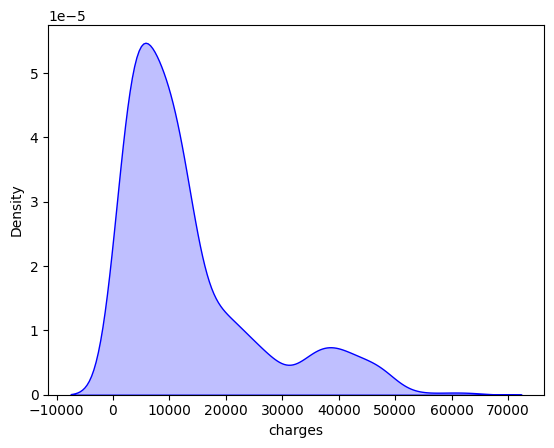

In [53]:
sns.distplot(
    df_clean.charges, 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

In [54]:
df_clean.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


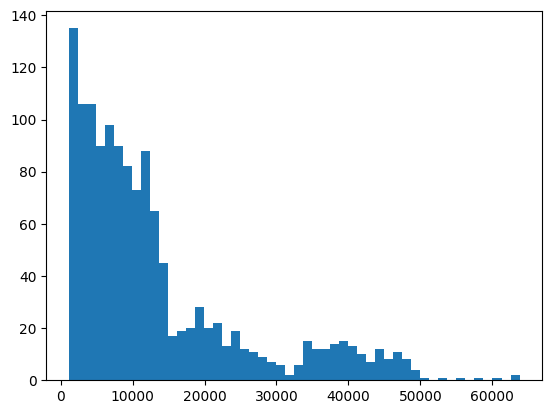

In [55]:
plt.hist(df_clean['charges'], bins=50);

In [56]:
# tiene pinta de exponencial

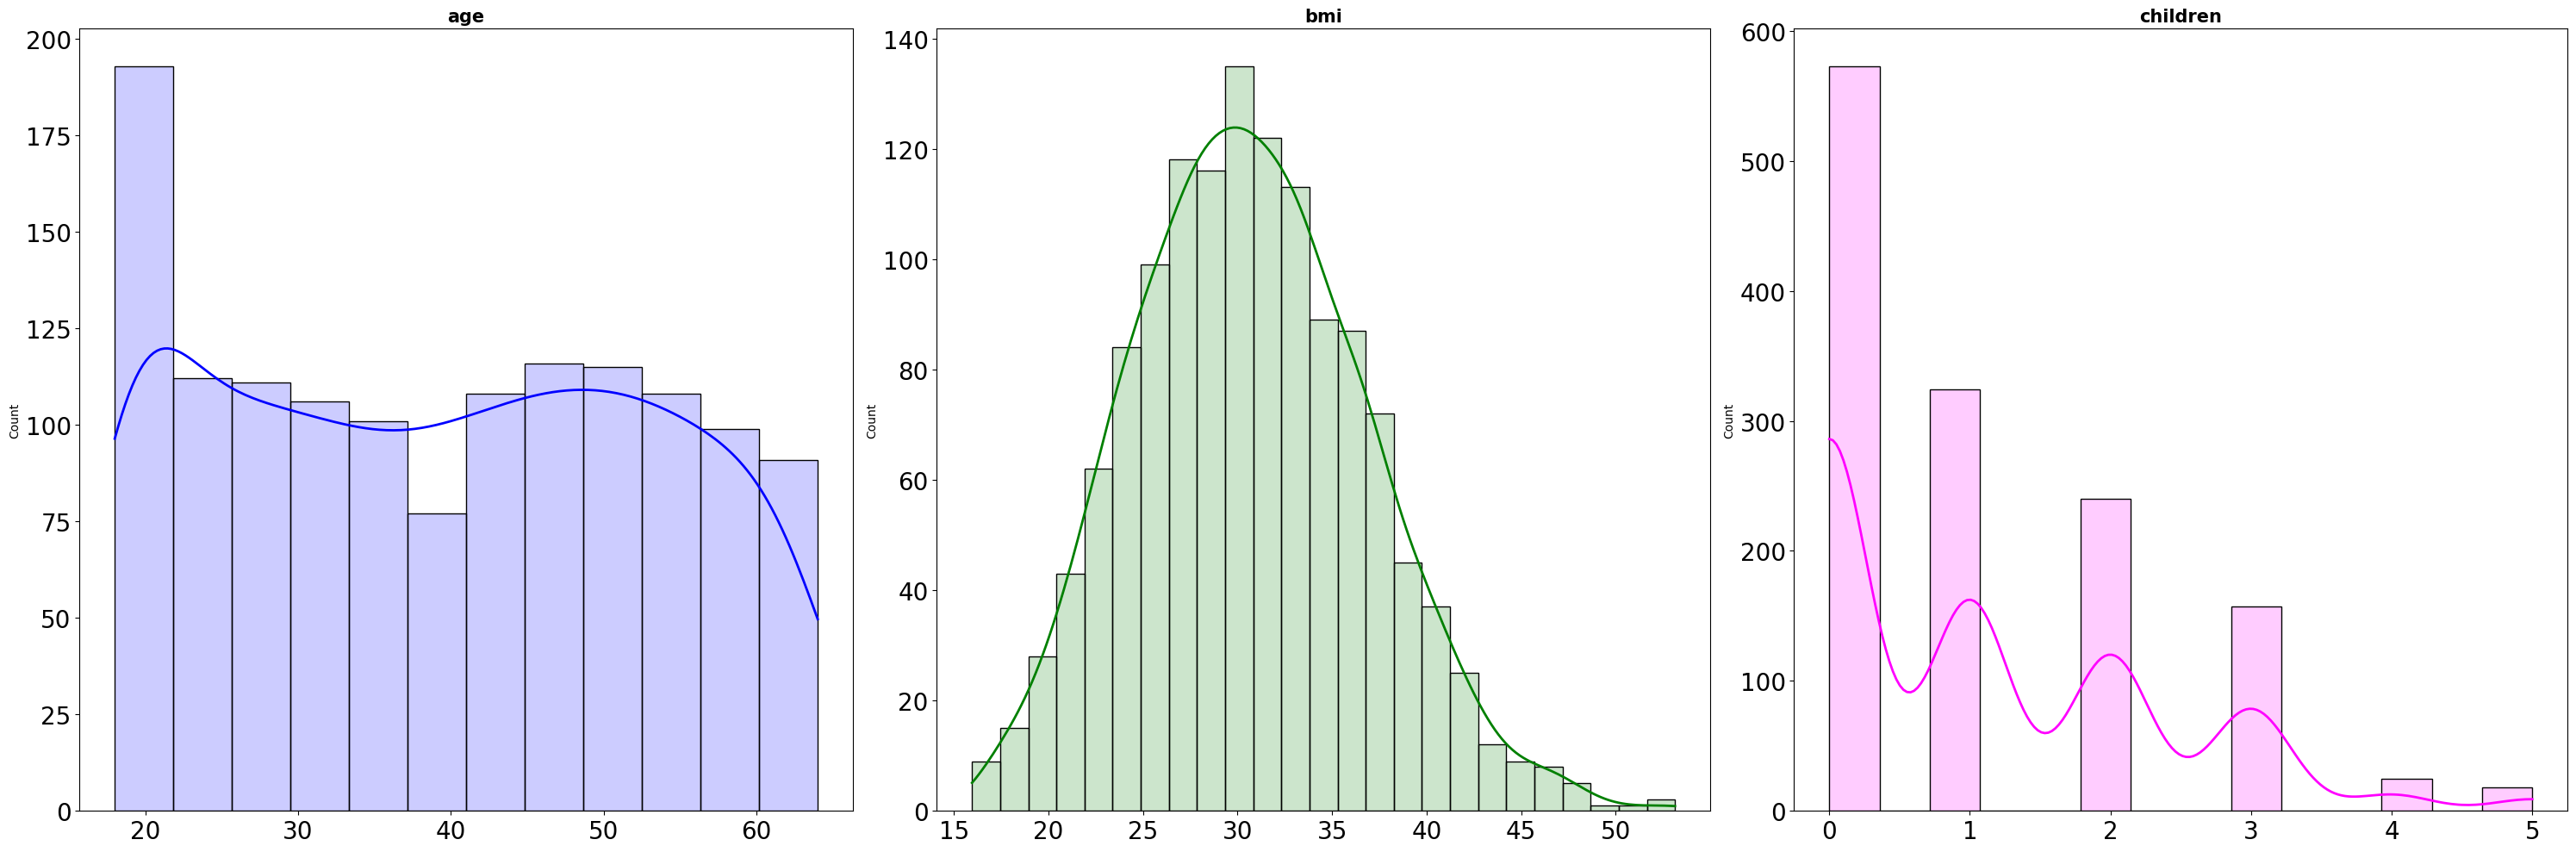

In [57]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "magenta"]

axes = axes.flat

columnas_numeric = df_clean.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df_clean,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();
    

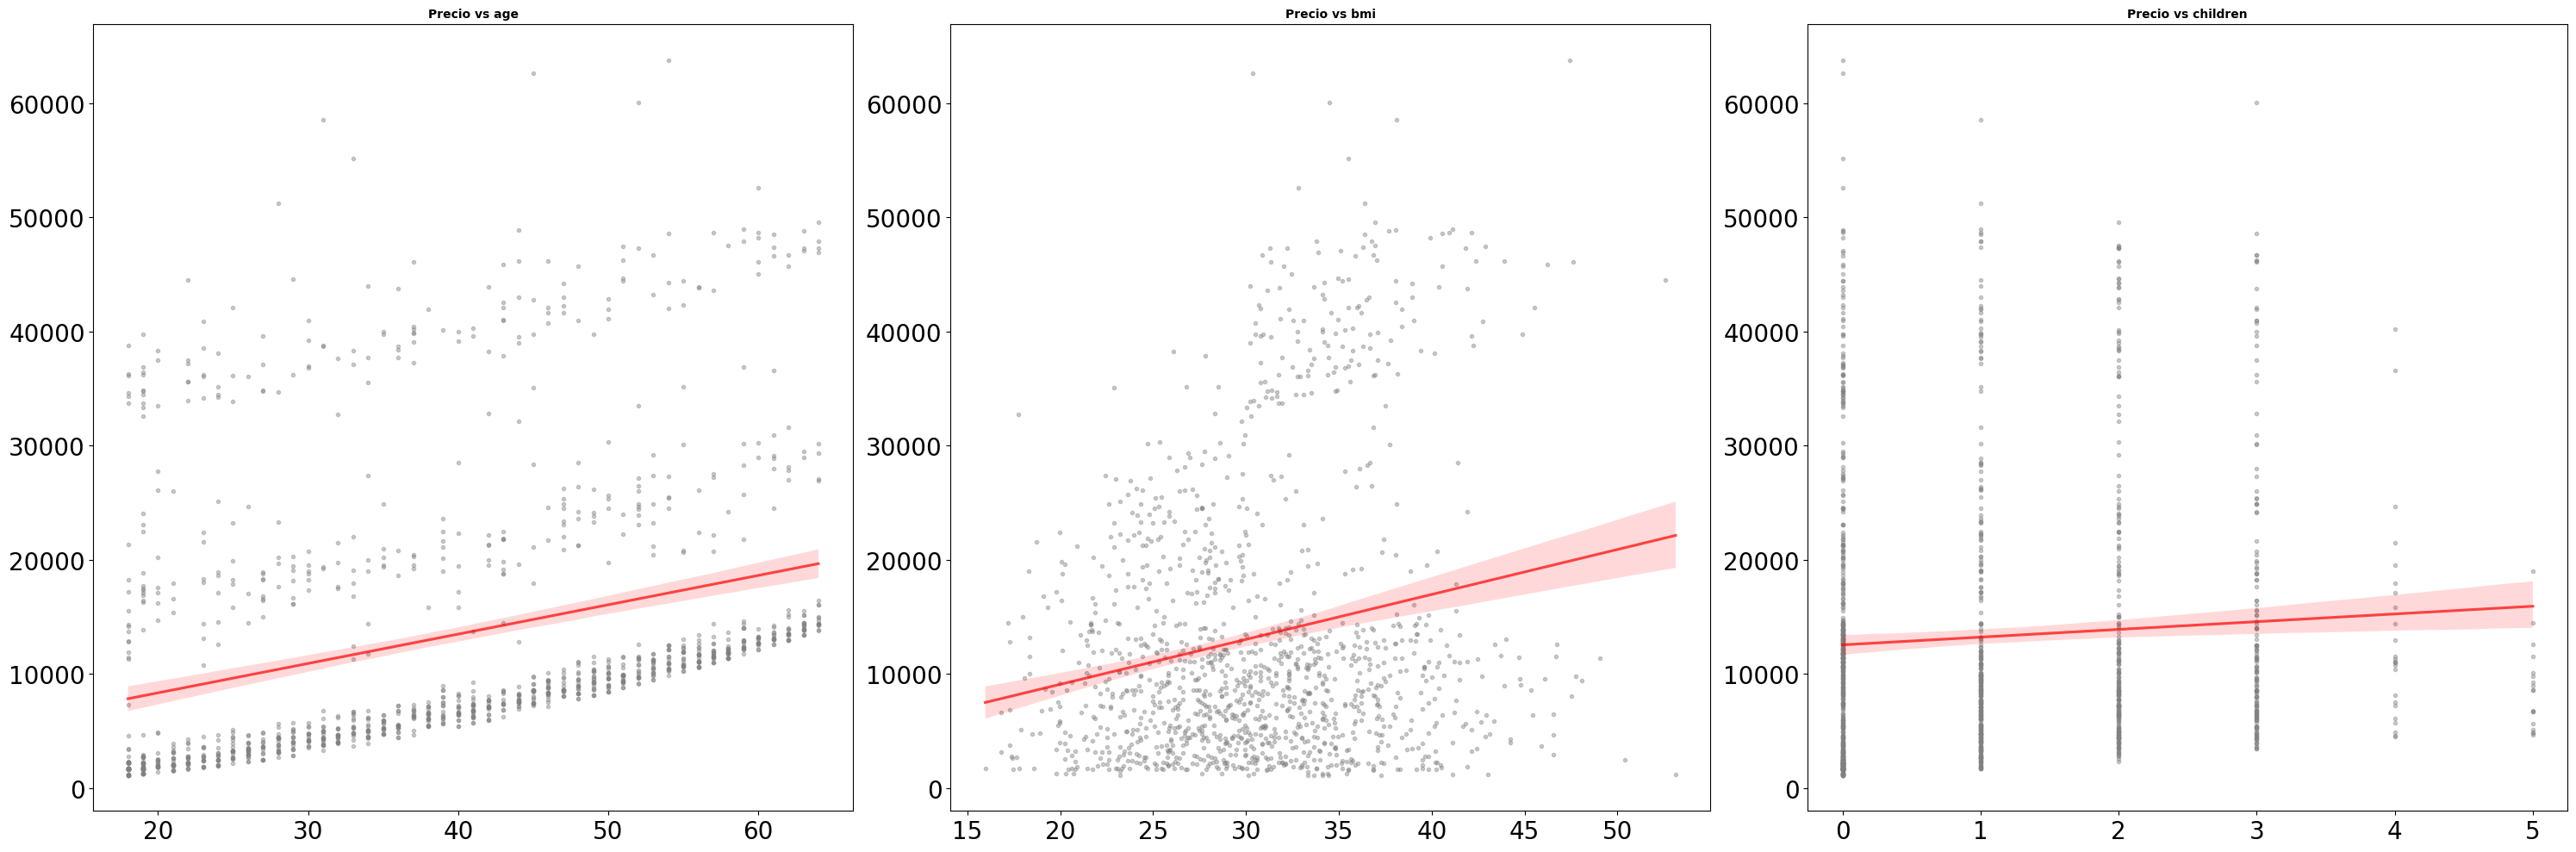

In [58]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df_clean.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df_clean[colum], 
        y = df_clean["charges"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Precio vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

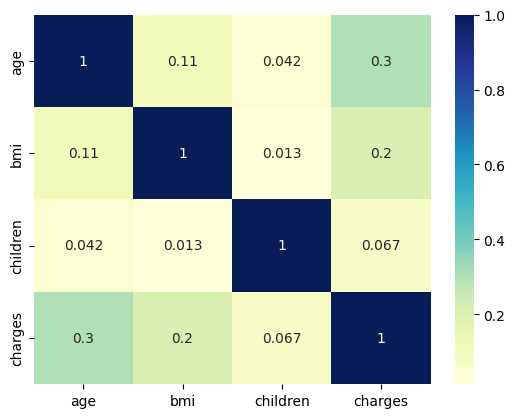

In [59]:
sns.heatmap(df_clean.corr(), 
           cmap = "YlGnBu", 
           annot = True);


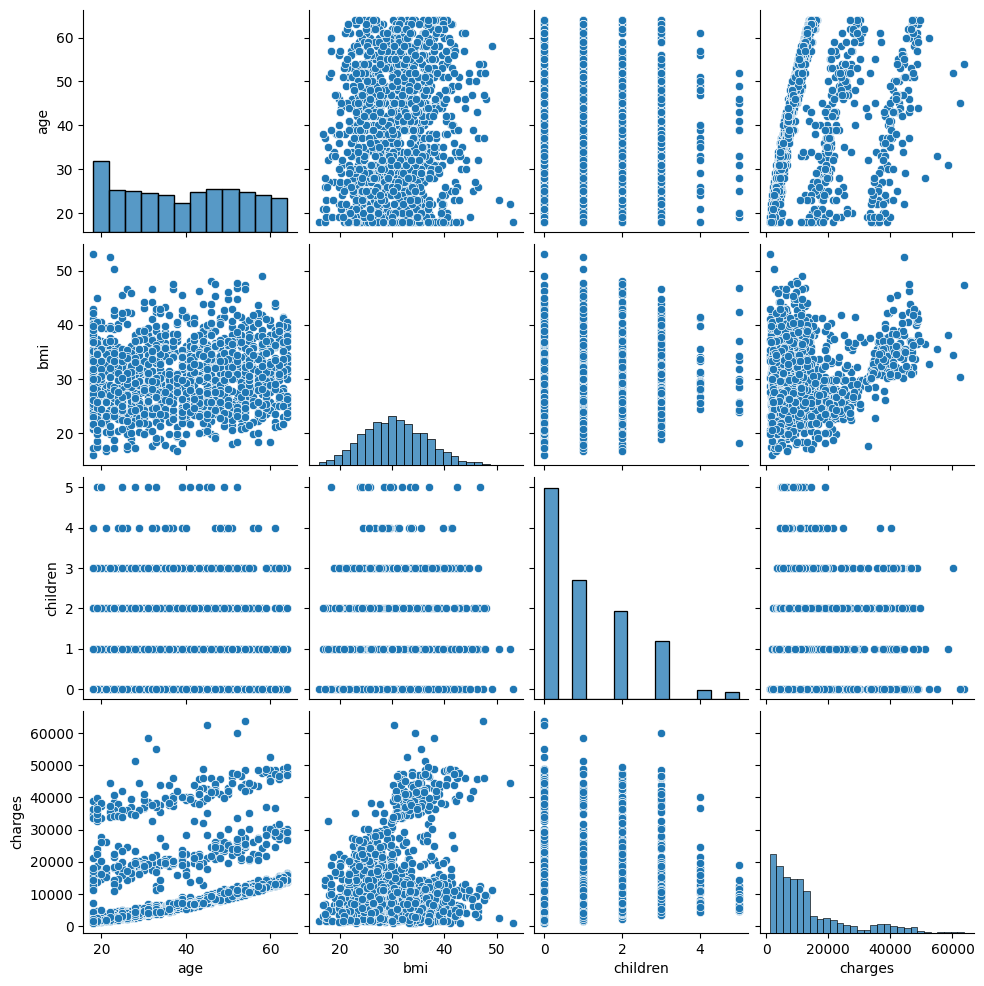

In [60]:
sns.pairplot(data= df_clean)

# VARIABLES CATEGORICAS

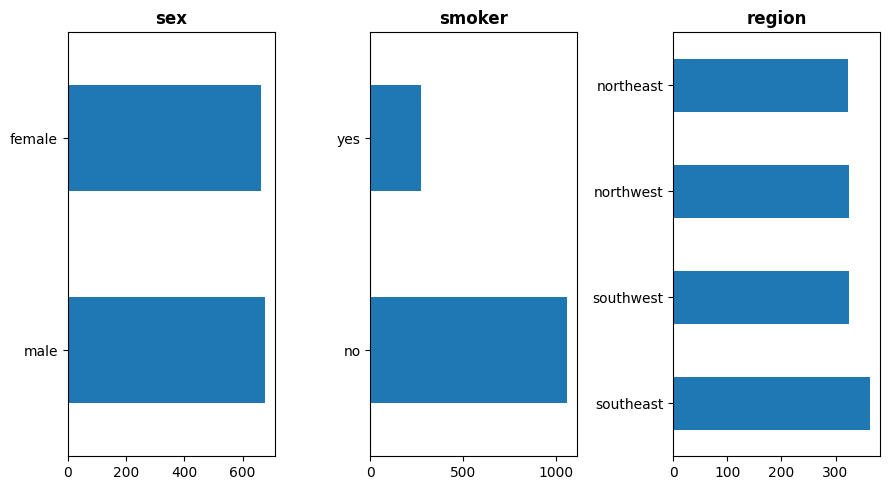

In [61]:
fig, axes = plt.subplots(1, 3, figsize = (9,5))

axes = axes.flat

columnas_object = df_clean.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout();

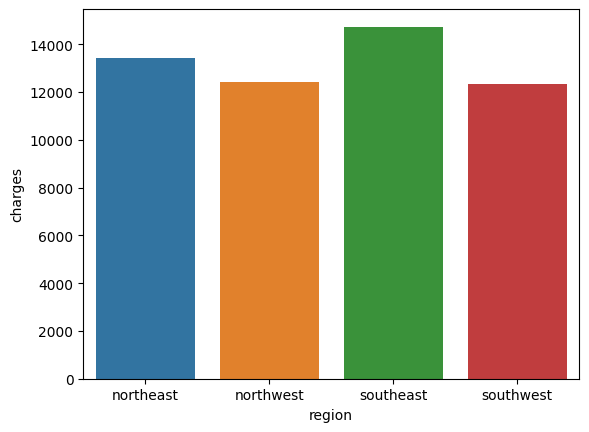

In [62]:
df_relacion_cate_region=df.groupby("region")["charges"].mean().reset_index()
sns.barplot(data=df_relacion_cate_region, x="region", y="charges");

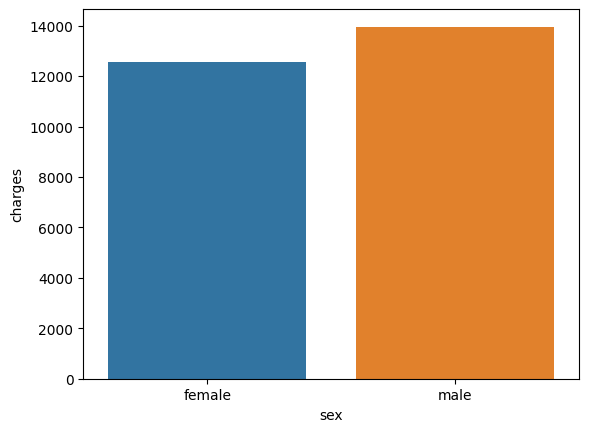

In [63]:
df_relacion_cate_sex=df.groupby("sex")["charges"].mean().reset_index()
sns.barplot(data=df_relacion_cate_sex, x="sex", y="charges");

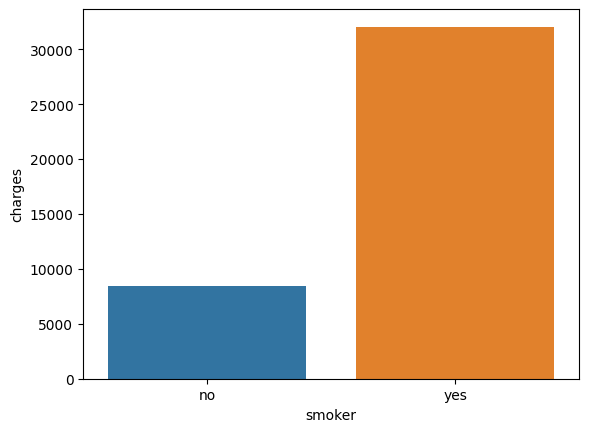

In [64]:
df_relacion_cate_smoker=df.groupby("smoker")["charges"].mean().reset_index()
sns.barplot(data=df_relacion_cate_smoker, x="smoker", y="charges");

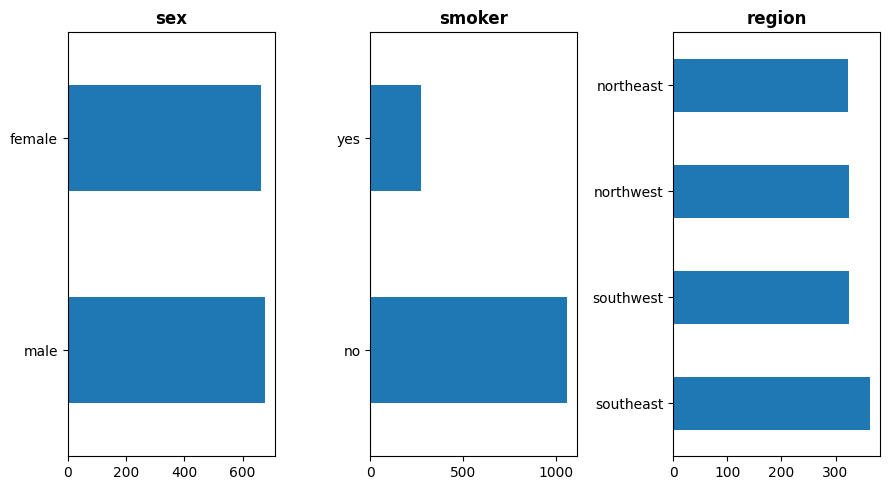

In [65]:
fig, axes = plt.subplots(1, 3, figsize = (9,5))

axes = axes.flat

columnas_object = df_clean.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout();

# GESTION DE OUTLIERS

In [66]:
df_clean.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [67]:
df_numericas = df_clean.select_dtypes(include=np.number)
df_numericas.head(2)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523


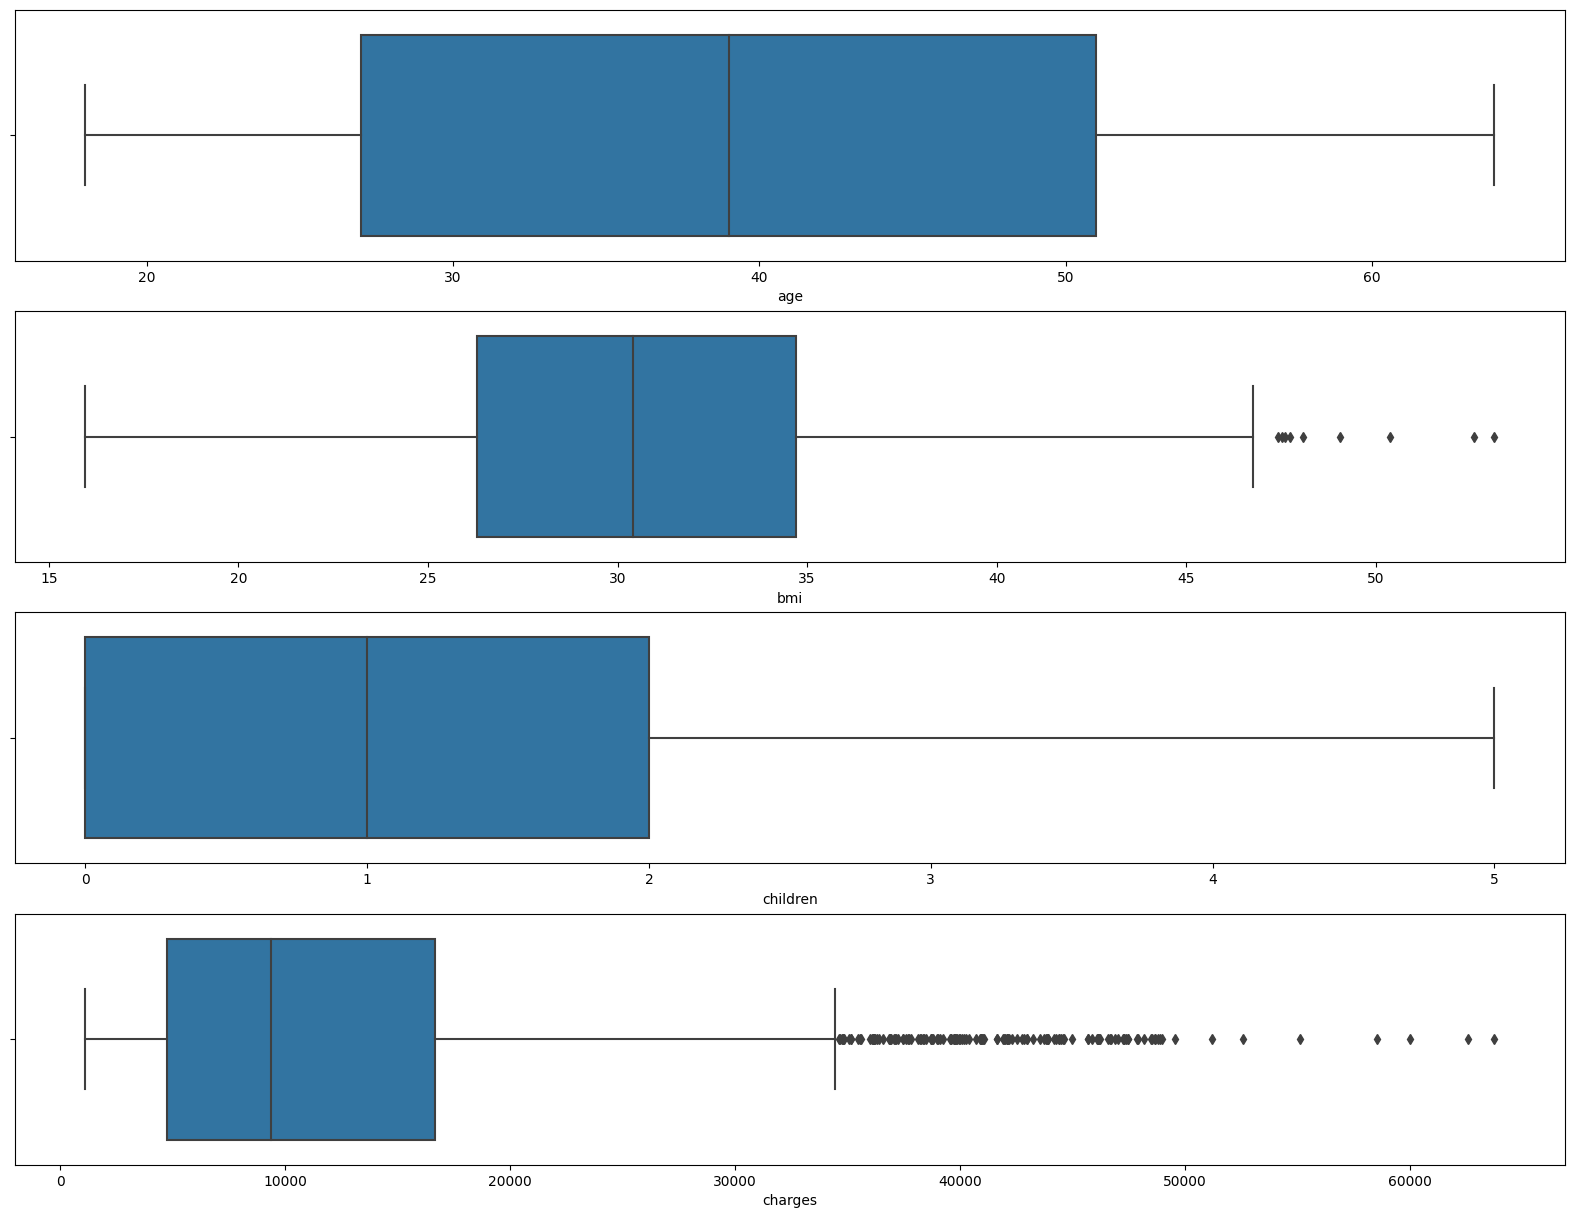

In [68]:
fig, ax = plt.subplots(4, 1, figsize=(20,15))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

In [111]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        
    
    return dicc_indices 

In [70]:
lista_columnas = df_numericas.columns
lista_columnas

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [71]:
ind = detectar_outliers(lista_columnas, df_clean)
print(ind)

{'bmi': [116, 286, 401, 543, 846, 859, 1046, 1087, 1316], 'charges': [14, 19, 23, 29, 30, 34, 38, 39, 49, 53, 55, 82, 84, 86, 94, 109, 123, 146, 158, 161, 175, 185, 203, 223, 240, 242, 251, 252, 254, 256, 263, 265, 271, 281, 288, 292, 298, 312, 314, 322, 327, 328, 330, 338, 373, 377, 381, 420, 421, 422, 441, 476, 488, 500, 524, 530, 543, 549, 558, 569, 577, 586, 608, 614, 620, 622, 628, 664, 666, 667, 673, 676, 681, 688, 696, 705, 724, 735, 737, 738, 741, 758, 802, 818, 825, 827, 841, 844, 849, 851, 855, 859, 882, 892, 900, 916, 946, 950, 952, 955, 957, 1011, 1020, 1021, 1030, 1035, 1036, 1046, 1048, 1061, 1069, 1077, 1089, 1095, 1110, 1116, 1117, 1121, 1123, 1138, 1145, 1151, 1155, 1185, 1205, 1206, 1217, 1229, 1239, 1240, 1248, 1283, 1287, 1290, 1299, 1300, 1302, 1312, 1322]}


In [72]:
outliers_bmi = ind["bmi"]
outliers_bmi

[116, 286, 401, 543, 846, 859, 1046, 1087, 1316]

Eliminamos los outliers de BMI

In [73]:
valores = set(outliers_bmi)

In [74]:
print(outliers_bmi)

[116, 286, 401, 543, 846, 859, 1046, 1087, 1316]


In [75]:
#copia:
df_sin_outliers2 = df_clean.copy()
df_clean.shape

(1337, 7)

In [76]:
final = df_sin_outliers2.drop(df_sin_outliers2.index[list(outliers_bmi)] )
final.shape

(1328, 7)

In [77]:
df_numericas_bmi_cambio = final.select_dtypes(include=np.number)
df_numericas_bmi_cambio.head(2)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523


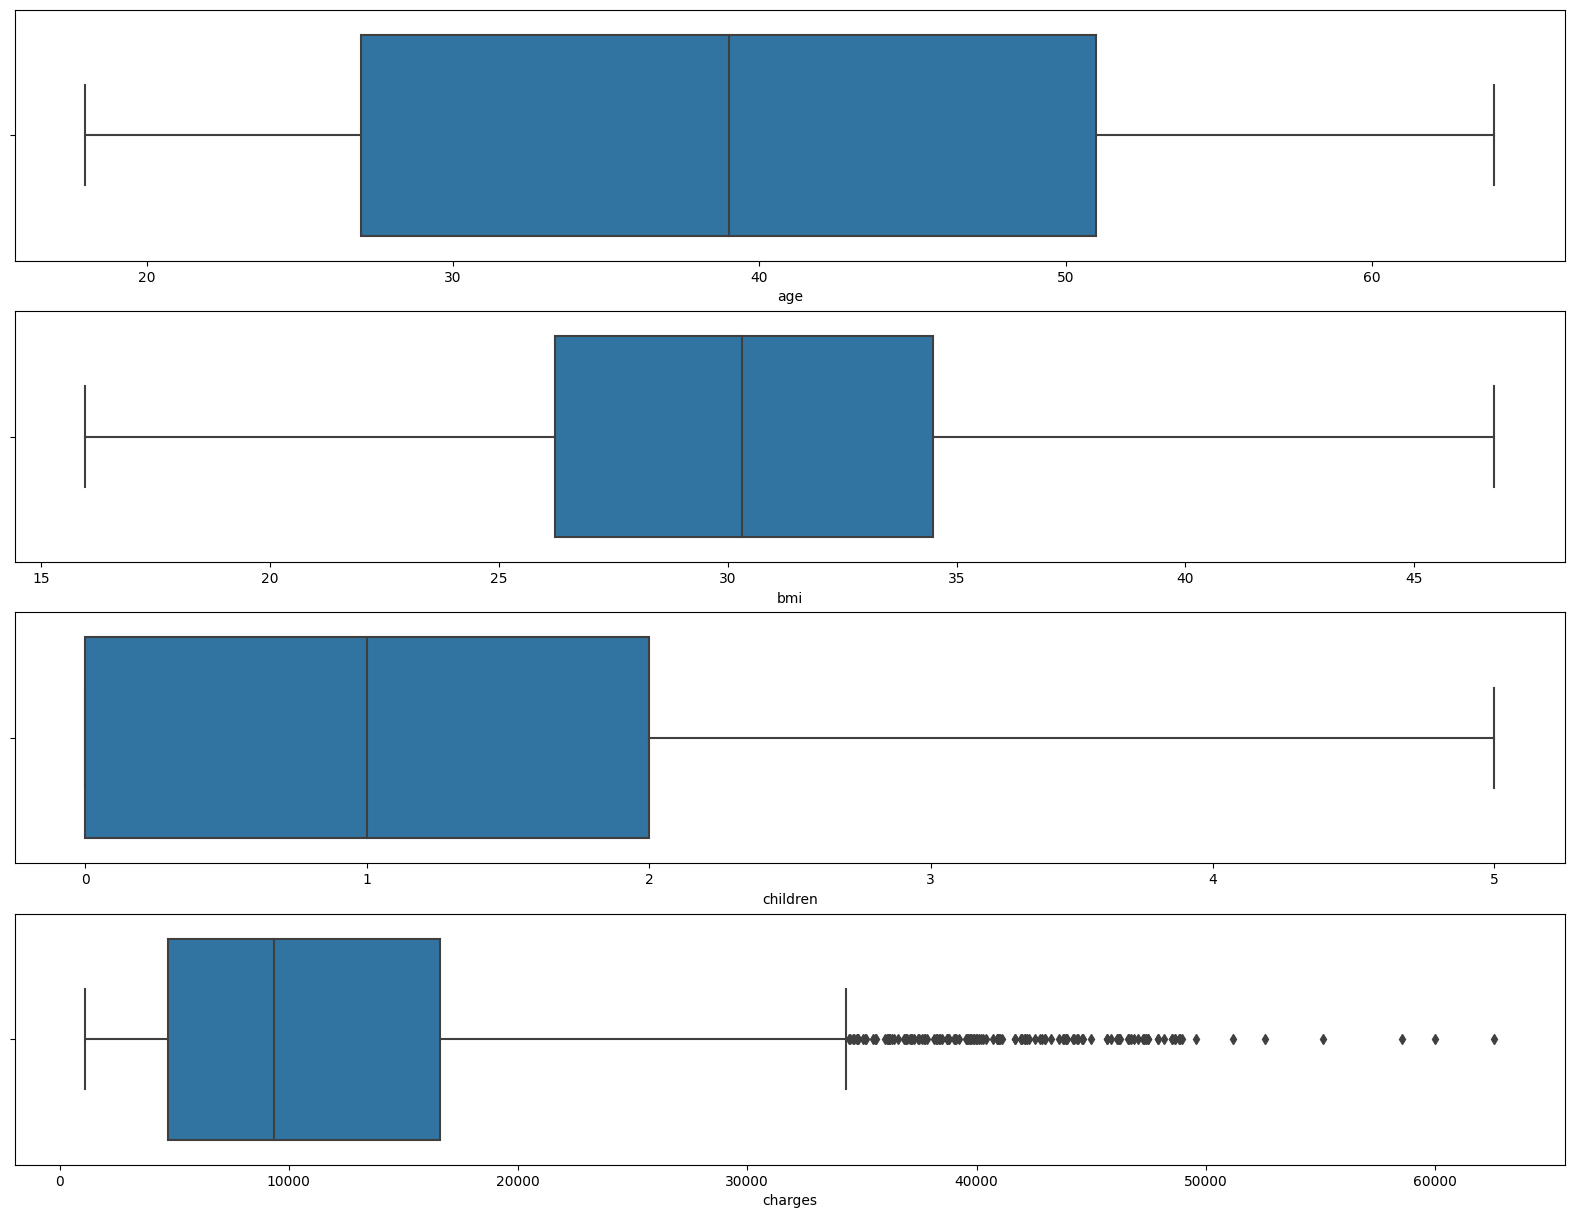

In [78]:
fig, ax = plt.subplots(4, 1, figsize=(20,15))

for i in range(len(df_numericas_bmi_cambio.columns)):
    sns.boxplot(x=df_numericas_bmi_cambio.columns[i], data=df_numericas_bmi_cambio, ax=ax[i])
plt.show()

separo los datos originales, en un df meto los los datos de charges que no son outliers y en e otro loss outliers

In [184]:
Q1 = np.nanpercentile(df['charges'], 25)
Q3 = np.nanpercentile(df['charges'], 75)
IQR = Q3 - Q1

upper_limit = Q1 - 0.5 * IQR #cojo 0,5 en vez de 1,5 
lower_limit = Q3 + 0.5 * IQR #cojo 0,5 en vez de 1,5 

# Separar los datos del rango intercuartílico
df_in_range = df_clean[df_clean["charges"]<(Q3 + 0.5 * IQR)]

# Separar los datos de los outliers
df_outliers = df_clean["charges"]>(Q3 + 0.5 * IQR)

In [185]:
df_in_range.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [186]:
df_numericas_in_range = df_in_range.select_dtypes(include=[np.number])
df_numericas_in_range.head(2)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523


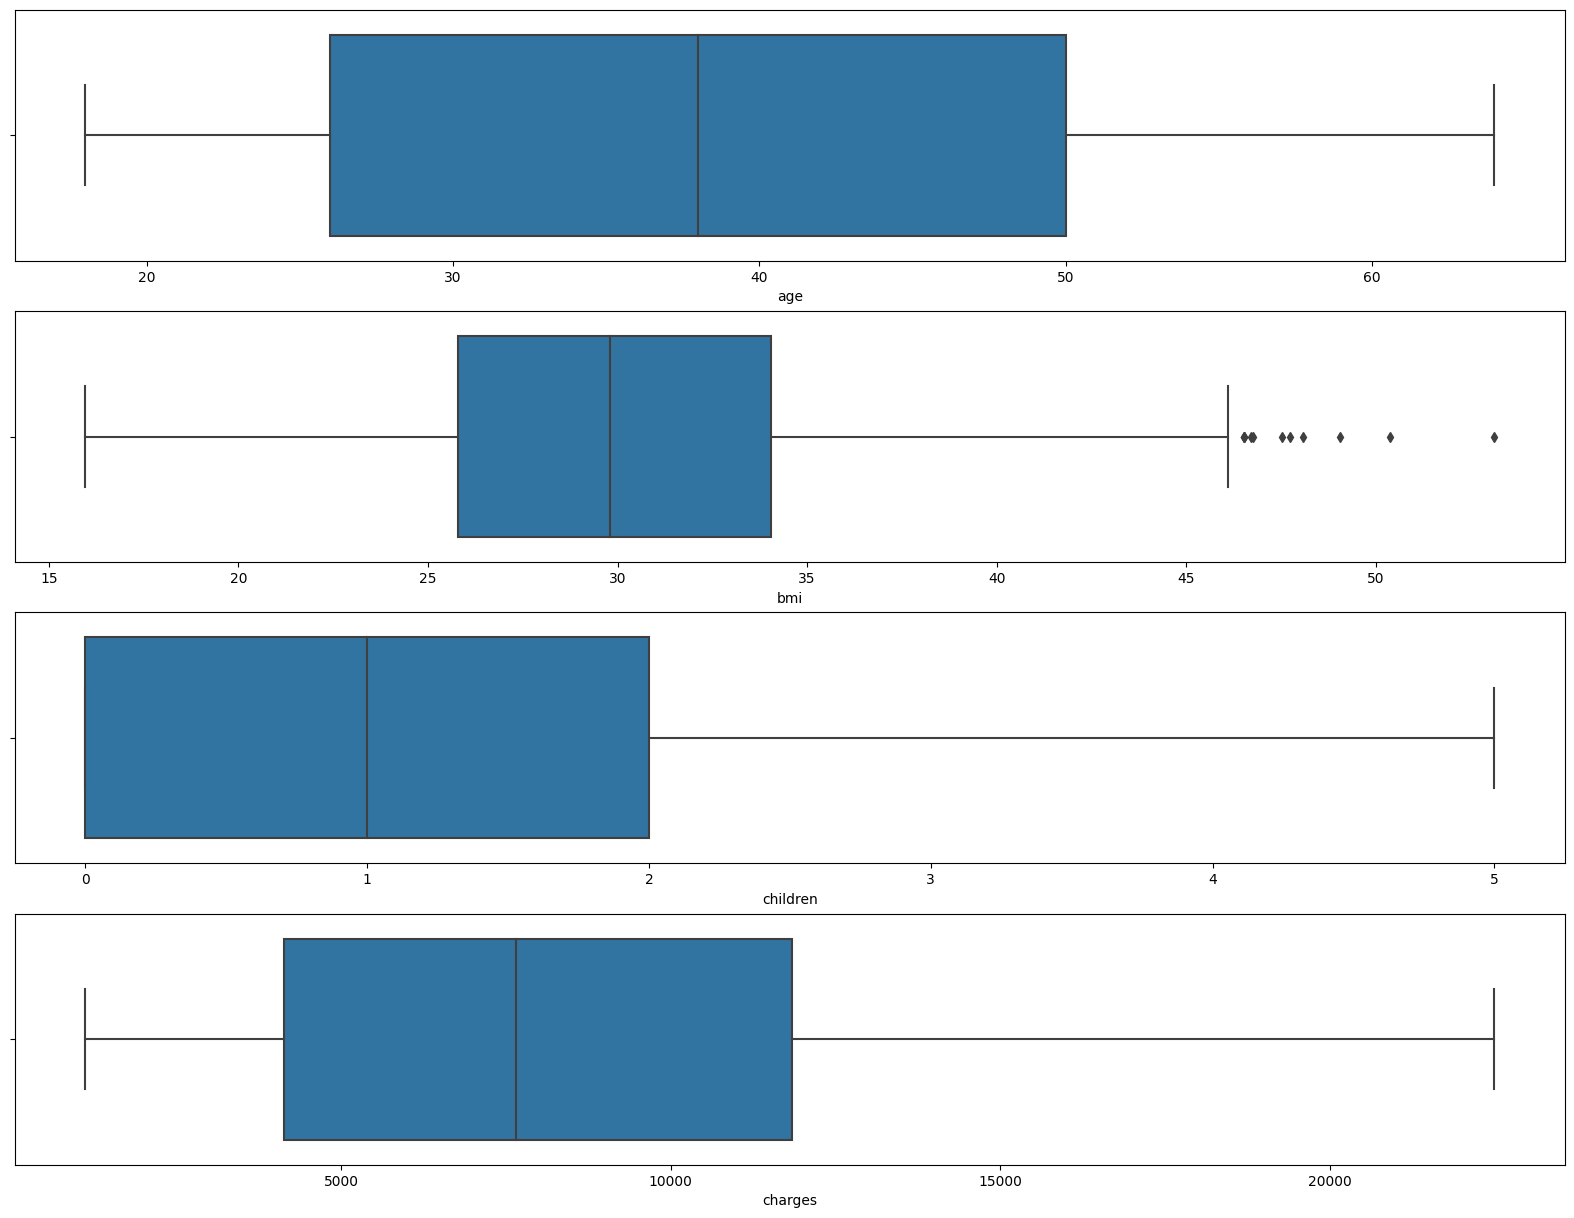

In [187]:
fig, ax = plt.subplots(4, 1, figsize=(20,15))

for i in range(len(df_numericas_in_range.columns)):
    sns.boxplot(x=df_numericas_in_range.columns[i], data=df_numericas_in_range, ax=ax[i])
plt.show()

In [188]:
lista_columnas2 = df_numericas_in_range.columns
lista_columnas2

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [189]:
ind2 = detectar_outliers(lista_columnas2, df_in_range)
print(ind2)

{'bmi': [116, 286, 401, 438, 454, 547, 659, 846, 929, 1087, 1316]}


In [190]:
df_numericas_in_range.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
age,1107.0,38.472448,13.871729,18.0000,26.000000,38.00000,50.000000,64.00000
bmi,1107.0,30.182249,6.111000,15.9600,25.800000,29.81000,34.055000,53.13000
children,1107.0,1.080397,1.219879,0.0000,0.000000,1.00000,2.000000,5.00000
charges,1107.0,8484.604101,5295.190034,1121.8739,4135.802575,7650.77375,11838.967525,22493.65964


In [191]:
for k, v in ind2.items():
    if k == "charges":
        mediana = df_numericas_in_range[k].median() 
        for i in v: 
            df_numericas_in_range.loc[i,k] = mediana 
    else:
        mediana = df_numericas_in_range[k].median() 
        for i in v:
            df_numericas_in_range.loc[i,k] = mediana 


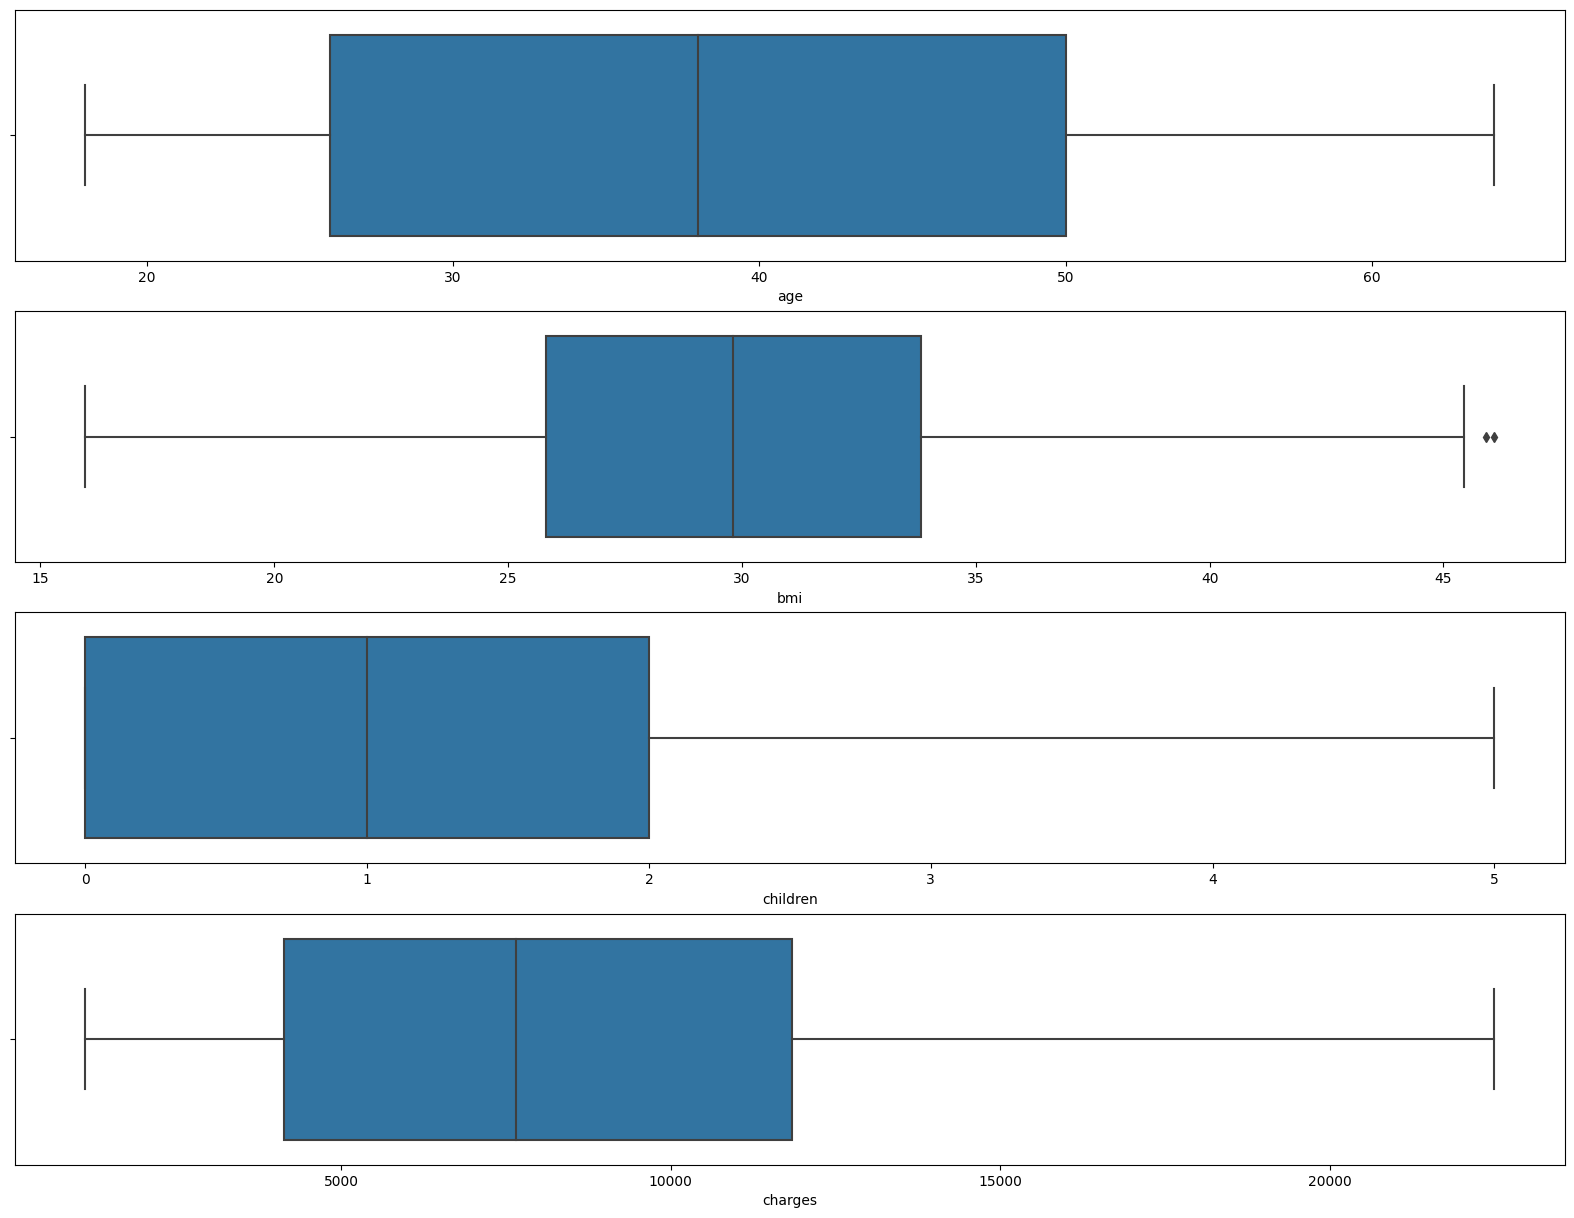

In [192]:
fig, ax = plt.subplots(4, 1, figsize=(20,15))

for i in range(len(df_numericas_in_range.columns)):
    sns.boxplot(x=df_numericas_in_range.columns[i], data=df_numericas_in_range, ax=ax[i])
plt.show()

# ¿Qué distribución tienen  nuestros datos? 


In [193]:
columnas = df_numericas_in_range.columns
columnas

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

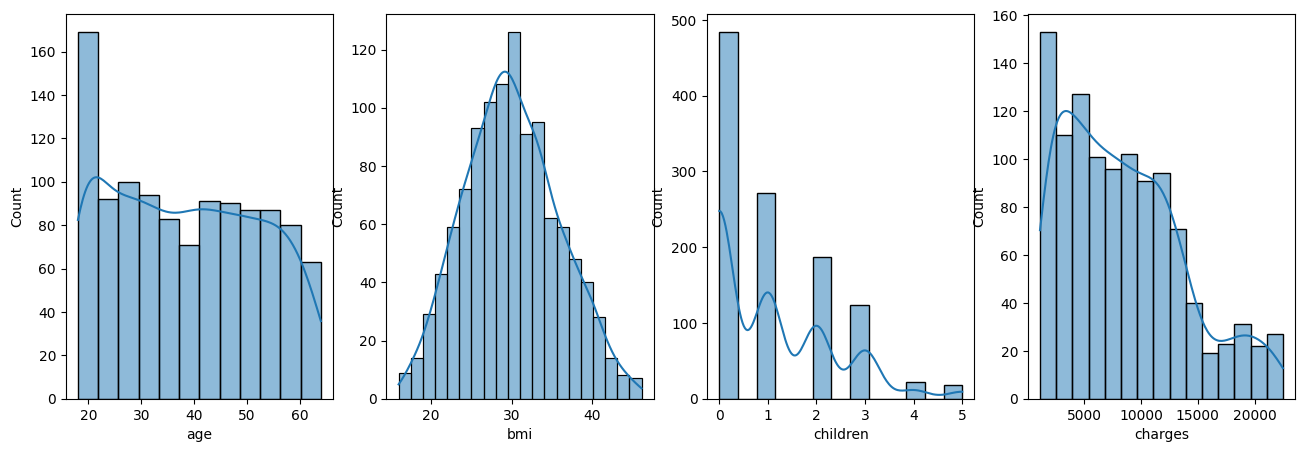

In [194]:
fig, ax = plt.subplots(1,5, figsize = (20,5))

ax = ax.flat
for i, columna in enumerate(columnas):
    sns.histplot(data = df_numericas_in_range, x = columna, kde = True, ax = ax[i])
    
fig.delaxes(ax[-1])
plt.show()

In [195]:
stats.shapiro(df_numericas_in_range["charges"])

ShapiroResult(statistic=0.9405457377433777, pvalue=1.2036943250176993e-20)

**Conclusión**: Nuestros datos no son normales y, por lo tanto podremos intertar realizar una serie de transformaciones que nos permitan que se ajusten a una normal.

### Manualmente


In [196]:
media = df_numericas_in_range["charges"].mean()
maximo = df_numericas_in_range["charges"].max() 
minimo = df_numericas_in_range["charges"].min()

In [197]:
df_numericas_in_range["charges_NORM"] = (df_numericas_in_range["charges"] - media) / (maximo - minimo )

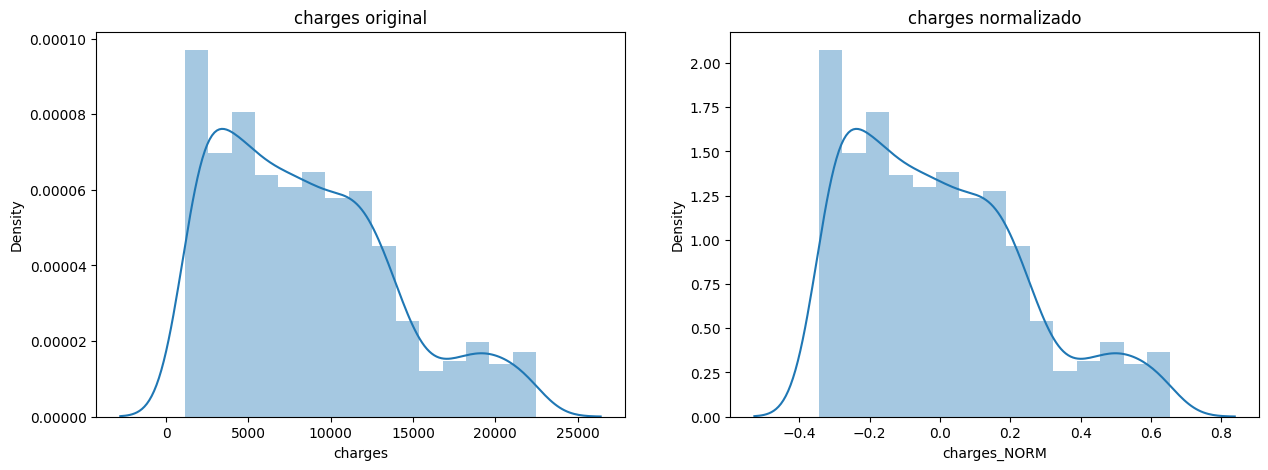

In [198]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('charges original')
axes[1].set_title('charges normalizado')

sns.distplot(df_numericas_in_range['charges'] ,ax = axes[0])
sns.distplot(df_numericas_in_range['charges_NORM'], ax = axes[1]);

In [199]:
stats.shapiro(df_numericas_in_range["charges_NORM"])

ShapiroResult(statistic=0.9405459761619568, pvalue=1.2037909371283061e-20)

In [200]:
df_numericas_in_range['charges_LOG'] = df_numericas_in_range['charges'].apply(lambda x: np.log(x) if x != 0 else 0)

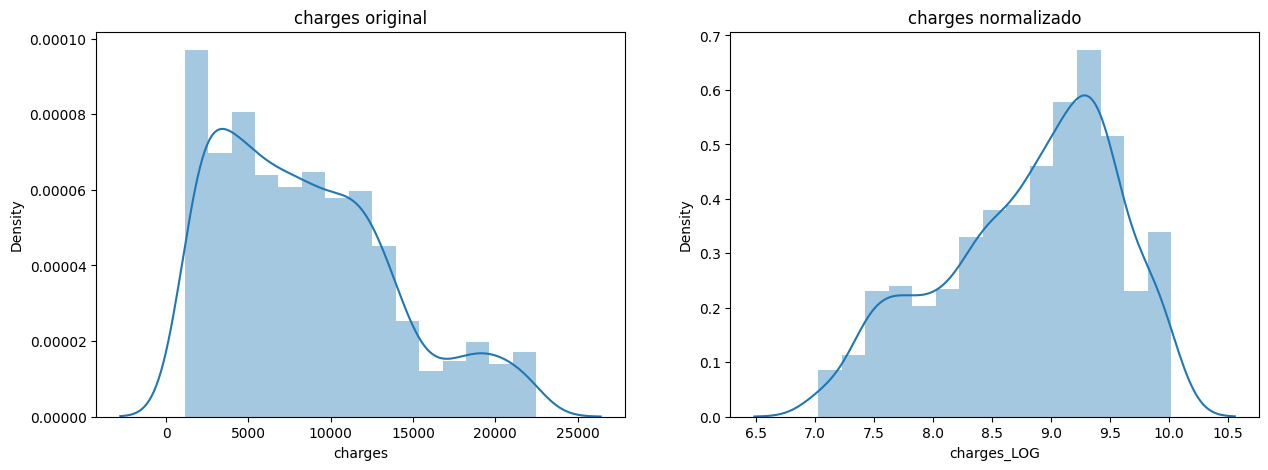

In [201]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('charges original')
axes[1].set_title('charges normalizado')

sns.distplot(df_numericas_in_range['charges'] ,ax = axes[0])
sns.distplot(df_numericas_in_range['charges_LOG'], ax = axes[1]);

In [202]:
 df_numericas_in_range['charges_SQRT'] = df_numericas_in_range['charges'].apply(lambda x: math.sqrt(x))

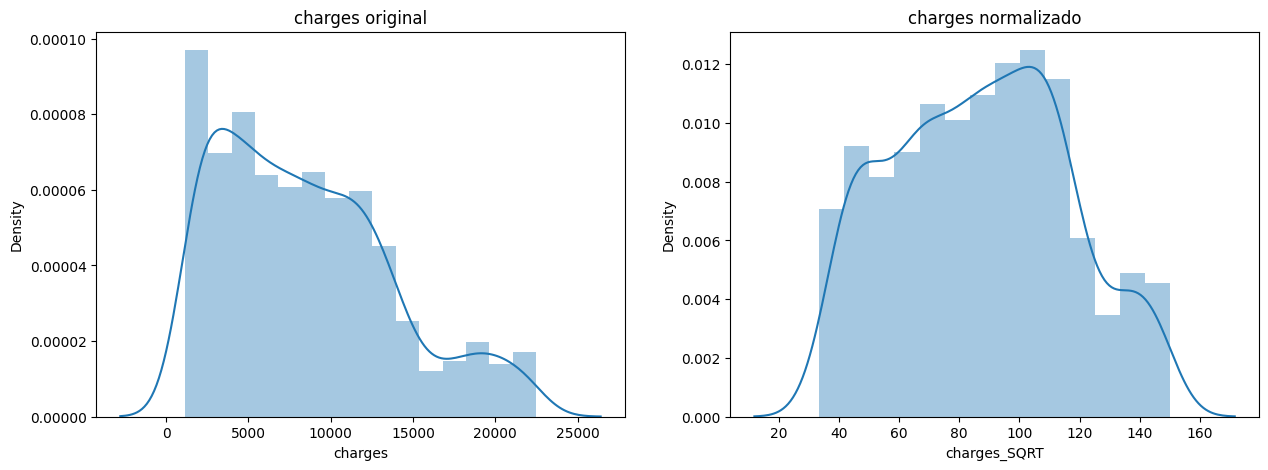

In [203]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('charges original')
axes[1].set_title('charges normalizado')

sns.distplot(df_numericas_in_range['charges'] ,ax = axes[0])
sns.distplot(df_numericas_in_range['charges_SQRT'], ax = axes[1]);

In [204]:
minmax = MinMaxScaler()
minmax.fit(df_numericas_in_range[["charges"]])

MinMaxScaler()

In [205]:
X_normalizadas = minmax.transform(df_numericas_in_range[["charges"]])
X_normalizadas.min(axis=0)
X_normalizadas.max(axis=0)
df_numericas_in_range["charges_NORM2"] = X_normalizadas

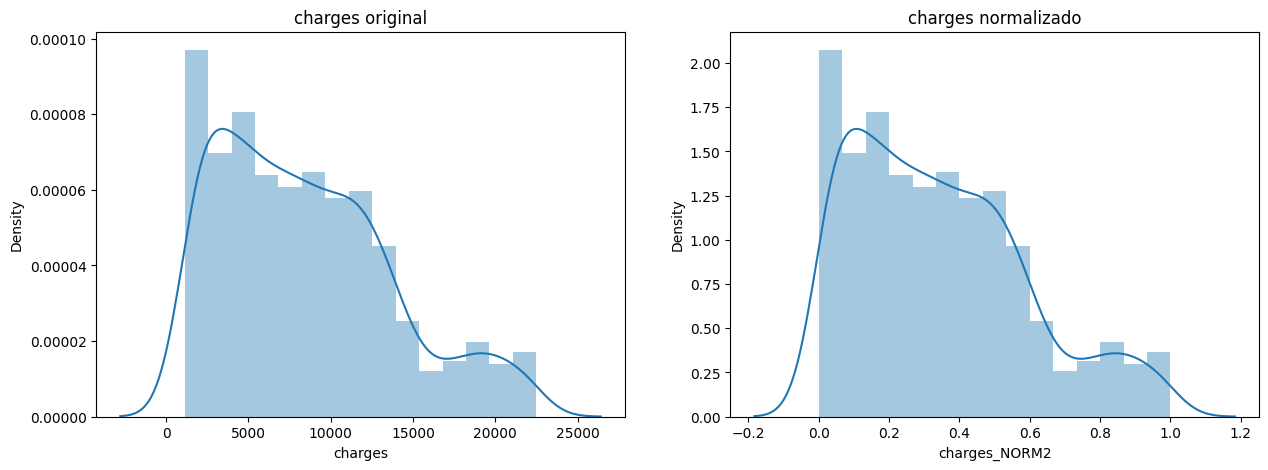

In [206]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('charges original')
axes[1].set_title('charges normalizado')

sns.distplot(df_numericas_in_range['charges'] ,ax = axes[0])
sns.distplot(df_numericas_in_range['charges_NORM2'], ax = axes[1]);

## Estandarización

In [246]:
scaler = StandardScaler()

In [208]:
num_col = df_numericas_in_range.drop(["charges", "charges_NORM", "charges_NORM2", "charges_SQRT", "charges_LOG"], axis=1).columns
num_col

Index(['age', 'bmi', 'children'], dtype='object')

In [249]:
scaler.fit(df_numericas_in_range[num_col])

StandardScaler()

In [250]:
X_escaladas = scaler.transform(df_numericas_in_range[num_col])
X_escaladas

array([[-1.40438505, -0.35996701, -0.88605963],
       [-1.47650669,  0.64591495, -0.06593588],
       [-0.75529021,  0.51396791,  1.57431164],
       ...,
       [-1.47650669,  0.32889934, -0.88605963],
       [-1.47650669,  1.1737031 , -0.88605963],
       [-1.26014175, -0.71982257, -0.88605963]])

In [251]:
df2 = df_numericas_in_range.copy()

In [252]:
df2[num_col] = X_escaladas
df2.head()

,age,bmi,children,charges,charges_NORM,charges_LOG,charges_SQRT,charges_NORM2
0,-1.404385,-0.359967,-0.886060,16884.92400,0.393057,9.734176,129.942002,0.737564
1,-1.476507,0.645915,-0.065936,1725.55230,-0.316261,7.453302,41.539768,0.028247
2,-0.755290,0.513968,1.574312,4449.46200,-0.188807,8.400538,66.704288,0.155700
3,-0.394682,-1.250181,-0.886060,21984.47061,0.631668,9.998092,148.271611,0.976175
4,-0.466804,-0.192034,-0.886060,3866.85520,-0.216068,8.260197,62.184043,0.128439


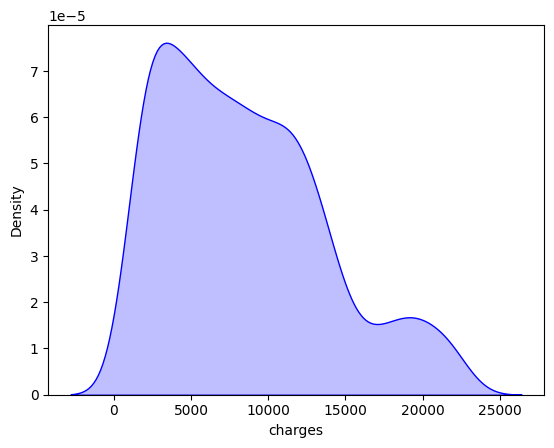

In [213]:
sns.distplot(
    df_numericas_in_range.charges, 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

# ENCODING

In [214]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder

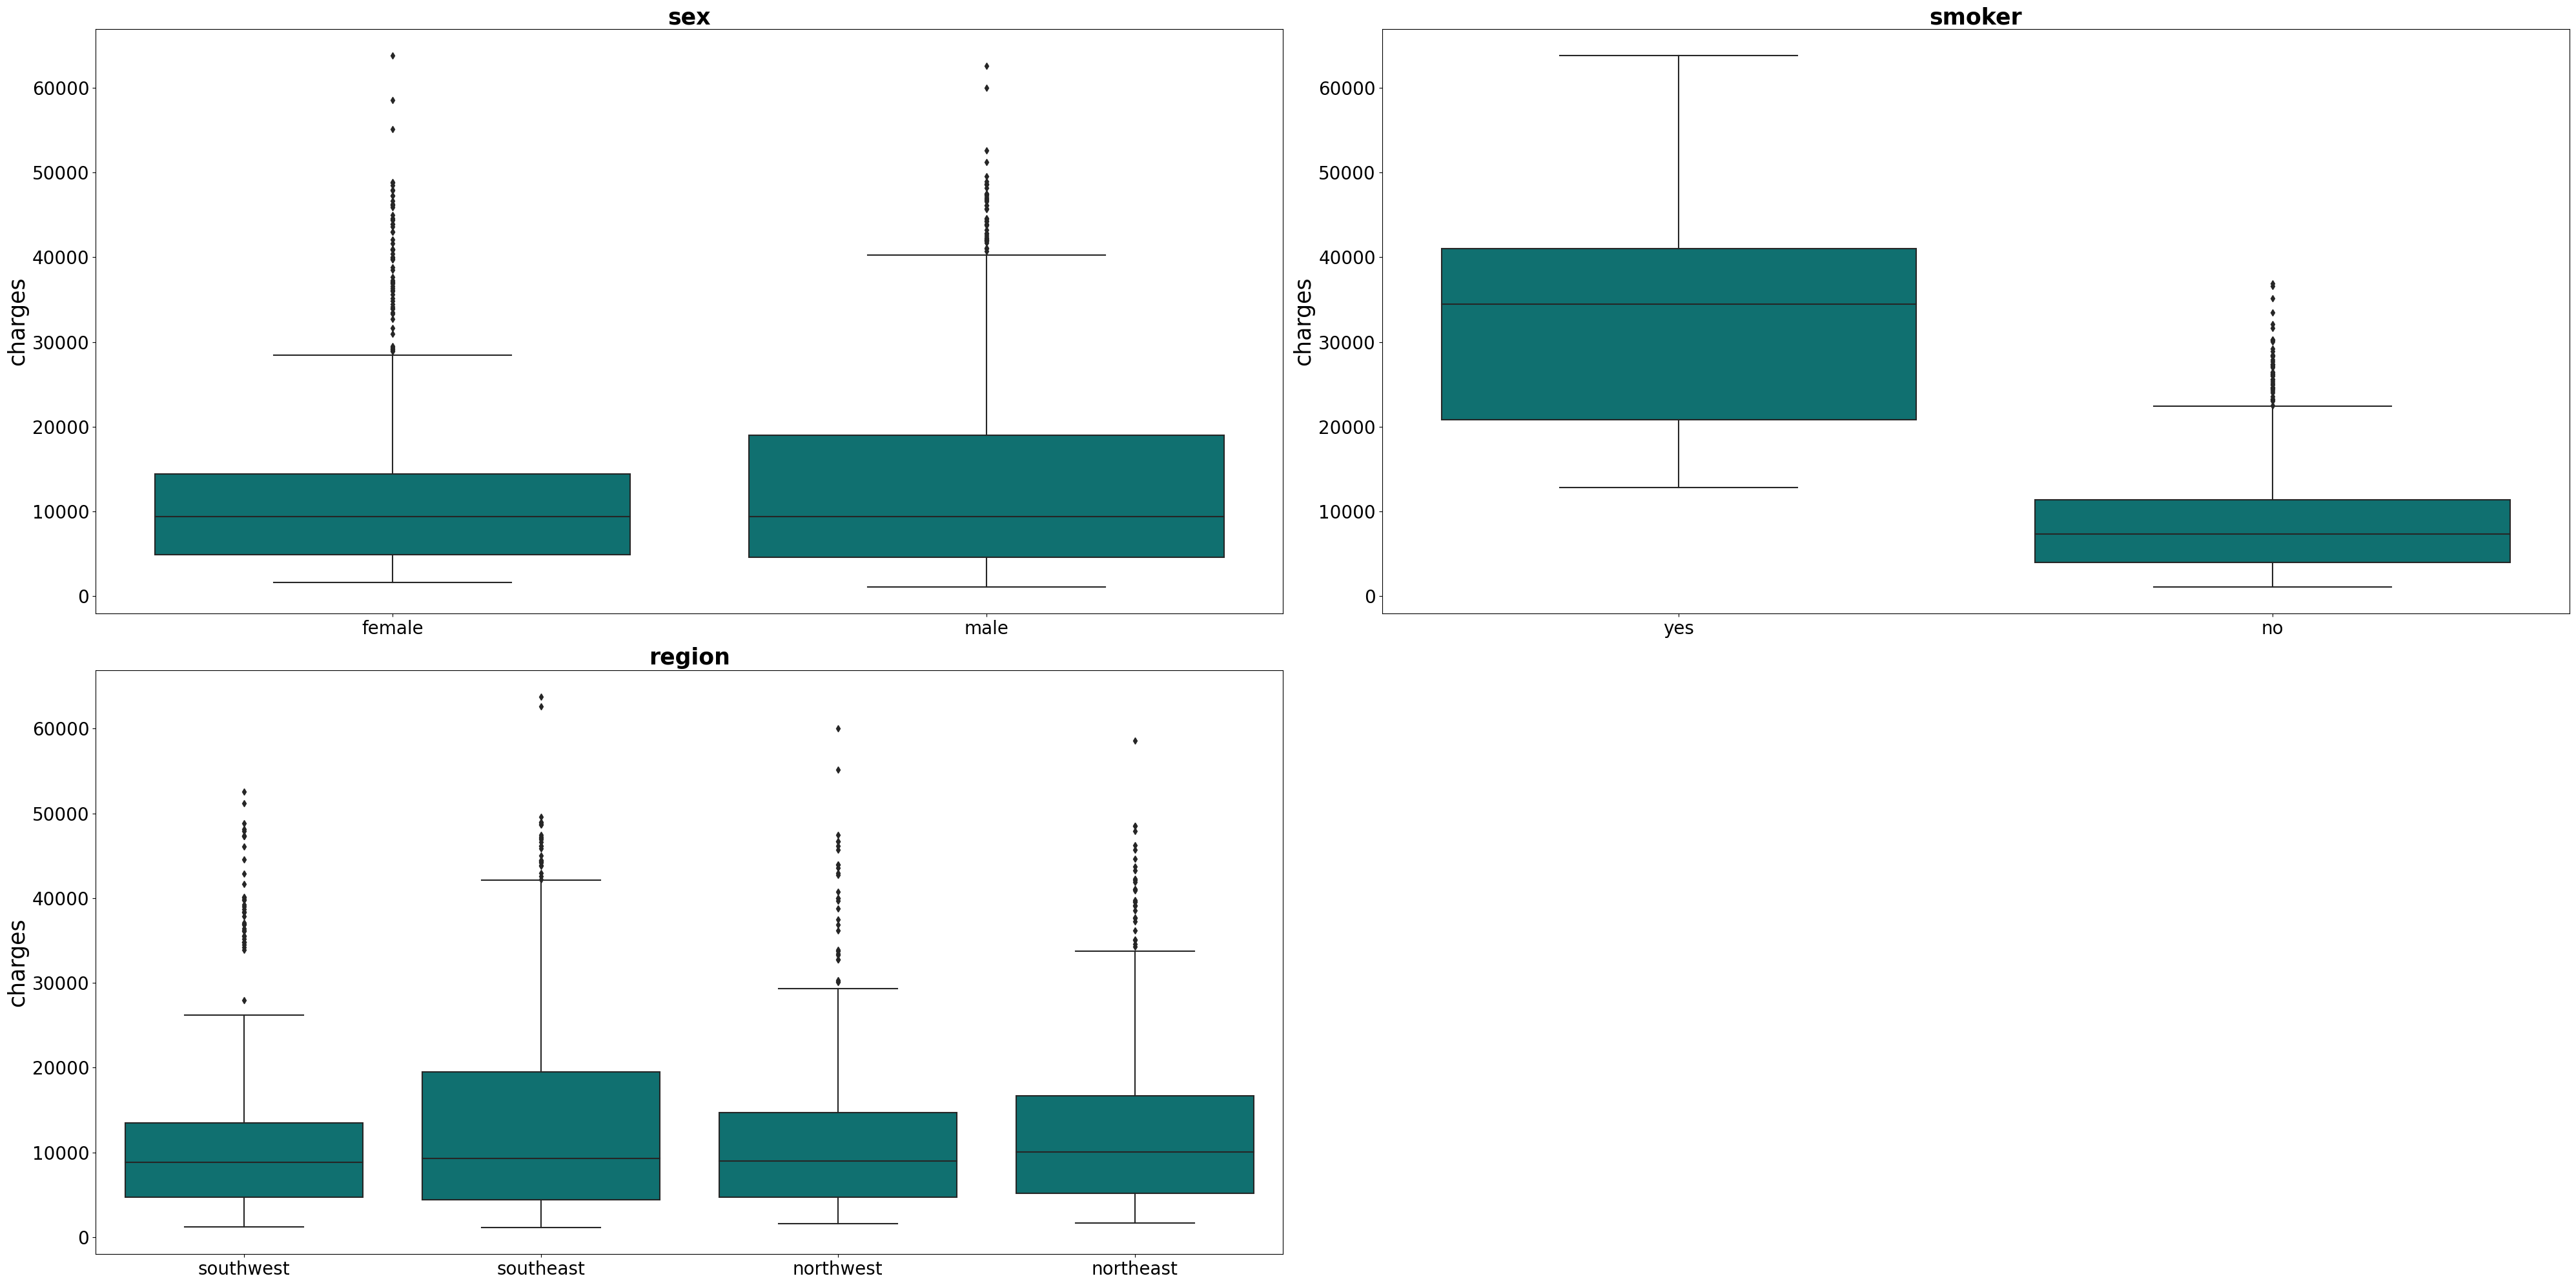

In [215]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (40, 20))


axes = axes.flat

columnas_cat = df_clean.select_dtypes(include = ["object", "category"]).columns

for i, colum in enumerate(columnas_cat): 
    sns.boxplot(
        data = df,
        x = colum,
        y = "charges",
        color = "teal", 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel( "charges", fontsize = 25)

fig.delaxes(axes[-1])

fig.tight_layout();

In [216]:
df1 = df_clean.copy()
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [233]:
df4 = df_clean.copy()
df4.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [234]:
dummies = pd.get_dummies(df4["region"], prefix_sep = "_", prefix = "region", dtype = int)
dummies.head()

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [235]:
df4[dummies.columns] = dummies
df4.drop(["region"], axis = 1, inplace = True)
df4.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,0,0,1
1,18,male,33.770,1,no,1725.55230,0,0,1,0
2,28,male,33.000,3,no,4449.46200,0,0,1,0
3,33,male,22.705,0,no,21984.47061,0,1,0,0
4,32,male,28.880,0,no,3866.85520,0,1,0,0


In [ ]:
dummies2 = pd.get_dummies(df4["sex"], prefix_sep = "_", prefix = "sex", dtype = int)
dummies2.head()

In [ ]:
dummies3 = pd.get_dummies(df4["smoker"], prefix_sep = "_", prefix = "smoker", dtype = int)
dummies3.head()

In [241]:
df4.head()

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,0,0,0,1,1,0,0,1
1,18,33.770,1,1725.55230,0,0,1,0,0,1,1,0
2,28,33.000,3,4449.46200,0,0,1,0,0,1,1,0
3,33,22.705,0,21984.47061,0,1,0,0,0,1,1,0
4,32,28.880,0,3866.85520,0,1,0,0,0,1,1,0


In [243]:
df4.to_csv('insurance2.csv', index=False)

# Separación train-test

In [255]:
from sklearn.model_selection import train_test_split

In [244]:
df_limpio = df4
df_limpio.head()

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,0,0,0,1,1,0,0,1
1,18,33.770,1,1725.55230,0,0,1,0,0,1,1,0
2,28,33.000,3,4449.46200,0,0,1,0,0,1,1,0
3,33,22.705,0,21984.47061,0,1,0,0,0,1,1,0
4,32,28.880,0,3866.85520,0,1,0,0,0,1,1,0


In [256]:
X = df_limpio.drop('charges', axis =1)
y = df_limpio['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)

In [257]:
print("Datos de entrenamiento")
print("-----------------------")
print(y_train.describe())

Datos de entrenamiento
-----------------------
count     1069.000000
mean     13030.203369
std      11706.530971
min       1121.873900
25%       4747.052900
50%       9290.139500
75%      16450.894700
max      62592.873090
Name: charges, dtype: float64


In [258]:
print("Datos de testeo")
print("-----------------------")
print(y_test.describe())

Datos de testeo
-----------------------
count      268.000000
mean     14272.007559
std      13581.026802
min       1131.506600
25%       4731.707250
50%       9535.650600
75%      17781.104820
max      63770.428010
Name: charges, dtype: float64


# Ajustamos el modelo

In [262]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [263]:
regressor = DecisionTreeRegressor(random_state = 0) 
  
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [264]:
max_features = np.sqrt(len(X_train.columns))
max_features

3.3166247903554

In [265]:
print(regressor.tree_.max_depth)

20


In [266]:
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [268]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [269]:
dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,2652.450799,3.538358e+07,5948.409463,0.807443,test,Decission Tree I
1,0.000000,0.000000e+00,0.000000,1.000000,train,Decission Tree I


In [271]:
param = {"max_depth": [4, 5, 6, 7],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,4,5,6]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

## Random Forest

In [272]:
param = {"max_depth": [4, 5, 6, 7],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,4,5,6]}

bosque = GridSearchCV(
            estimator=RandomForestRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [273]:
bosque.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
bos = bosque.best_estimator_
bos

## Prediccion

In [ ]:
y_pred_test_rf = bos.predict(X_test)
y_pred_train_rf = bos.predict(X_train)

In [ ]:
rf_results = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest")
rf_results

In [ ]:
df_all = pd.concat([df_all, rf_results ], axis = 0)
df_all

In [274]:
from scipy.special import boxcox, inv_boxcox
inv_boxcox(4.165447e-01, 0.048852479880369226)

1.5103828293681822

## Importancia variables

In [ ]:
importancia_predictores_rf = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': bos.feature_importances_}
                            )
importancia_predictores_rf

In [ ]:
genero = pd.DataFrame(importancia_predictores_rf.iloc[-2:]) # revisar iloc
genero

In [ ]:
smoker = pd.DataFrame(importancia_predictores_rf.iloc[-2:]) # revisar iloc
smoker

In [ ]:
importancia_predictores_rf.drop(genero.index, inplace = True)
importancia_predictores_rf.drop(smoker.index, inplace = True)